**Датасет**

Список персонажей DC Comics.

https://www.kaggle.com/datasets/arunasivapragasam/dc-comics

Мы запускаем свою линейку комиксов и нам нужно определить паттерн (набор черт, например: мужчина с голубыми глазами и с засекреченной личностью, но при этом злодей) пяти наиболее популярных (по числу появлений) персонажей.


-----


**Гипотеза**

Самые популярные персонажи часто похожи и можно из них выделить некие паттерны, на которые можно опираться при создании персонажей.

**Что нужно сделать**

Итак, после того как вы выбрали датасет, можно приступать к выполнению задания.

Мы рекомендуем:

●     Все пункты выполнять в самостоятельно созданном Python-ноутбуке, который будет являться результатом вашей работы. После выполнения заданий вы сдадите готовый ноутбук на проверку.

●     Следовать пунктам задания, поясняя выполняемые действия текстом.

●     Делать выводы по результатам анализа — один из критериев оценки работы.

●     В местах, где возникнут трудности и вопросы, написать пояснение в ноутбуке — что за сложность и в чем она проявляется.


-----


**Последовательность выполнения заданий:**

●     Проверьте качество данных

●     Рассчитайте основные статистические показатели для числовых переменных, такие как среднее, медиана и стандартное отклонение. Другие статистические показатели также могут быть рассчитаны в зависимости от конкретных целей и задач анализа данных. Сделайте вывод по результатам.

●     Постройте графики, которые считаете наиболее релевантными для анализа данных. Графики должны быть информативными и помочь вам лучше понять данные. При необходимости введите дополнительные колонки в исходный датафрейм.

После построения графиков проанализируйте полученные результаты и сделайте выводы (например, какие данные имеют наибольшую значимость, какие переменные влияют на результаты). Если это необходимо доработайте с данными на этом этапе.

●     Вычислите матрицу корреляции и постройте heatmap для нее. Сделайте выводы о взаимосвязях, обнаруженных в данных.

●     Сделайте общий вывод по исследуемому датасету. Предложите возможные способы применения полученных результатов анализа данных.

Ссылка на работу: https://colab.research.google.com/drive/182xNfjmabiL4_AVIxxcvpCtLzbIs1I34?usp=sharing

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_initial = pd.read_csv("./dc-comics.csv")

In [3]:
# Анализ таблицы в целом
dataset_initial.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April",1940.0


In [4]:
dataset_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   ALIVE             6893 non-null   object 
 9   APPEARANCES       6541 non-null   float64
 10  FIRST APPEARANCE  6827 non-null   object 
 11  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 646.6+ KB


In [5]:
dataset_initial.describe()

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


1. Проверим качество данных

In [6]:
dataset_initial.isna().sum()
# --> Comment 1.1. Пропуски есть в столбцах ID, ALIGN, EYE, HAIR, SEX, ALIVE, APPEARANCES, FIRST APPEARANCE, YEAR

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [7]:
dataset_initial['HAIR'].unique()
# --> Comment 1.2. Можем создать некий mapper для значений и хранить их в более удобном для анализа формате (TBD)

array(['Black Hair', 'Brown Hair', 'White Hair', 'Blond Hair', 'Red Hair',
       nan, 'Green Hair', 'Strawberry Blond Hair', 'Grey Hair',
       'Silver Hair', 'Orange Hair', 'Purple Hair', 'Gold Hair',
       'Blue Hair', 'Reddish Brown Hair', 'Pink Hair', 'Violet Hair',
       'Platinum Blond Hair'], dtype=object)

In [8]:
dataset_initial['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

In [9]:
dataset_initial['EYE'].unique()
# --> Comment 1.3. Можем создать некий mapper для значений и хранить их в более удобном для анализа формате (TBD)

array(['Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Purple Eyes',
       'Black Eyes', 'White Eyes', 'Red Eyes', 'Photocellular Eyes',
       'Hazel Eyes', 'Amber Eyes', 'Yellow Eyes', nan, 'Grey Eyes',
       'Pink Eyes', 'Violet Eyes', 'Gold Eyes', 'Orange Eyes',
       'Auburn Hair'], dtype=object)

In [10]:
dataset_initial['ID'].unique()
# --> Comment 1.3.1. Можем создать некий mapper для значений и хранить их в более удобном для анализа формате (TBD).
# --> Comment 1.3.2. Можем заполнить пропуски значением 'Identity Unknown'

array(['Secret Identity', 'Public Identity', nan, 'Identity Unknown'],
      dtype=object)

In [11]:
dataset_initial['ALIGN'].unique()
# --> Comment 1.4. Можем создать некий mapper для значений и хранить их в более удобном для анализа формате (TBD)

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [12]:
dataset_initial['ALIVE'].unique()
# --> Comment 1.5. Можем создать некий mapper для значений и хранить их в более удобном для анализа формате (TBD)

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [13]:
dataset_initial['FIRST APPEARANCE'].unique()
# --> Comment 1.6. Стоит перевести в datetime
# --> Comment 1.7. 'FIRST APPEARANCE' содержит информацию, которая также содержится в 'YEAR'. Колонку 'FIRST APPEARANCE' можно удалить как дубликат.

array(['1939, May', '1986, October', '1959, October', '1987, February',
       '1940, April', '1941, December', '1941, November', '1989, August',
       '1969, November', '1956, October', '1940, July', '1967, January',
       '1940, January', '1938, June', '1943, April', '1994, January',
       '1961, October', '1976, February', '1942, January',
       '1965, November', '1968, March', '1980, October', '1993, June',
       '1960, May', '1971, December', '1940, June', '1959, April',
       '1960, February', '1965, January', '1964, November',
       '1940, February', '1986, February', '1996, January', '1940, May',
       '1974, July', '1989, April', '1939, April', '1970, December',
       '1987, March', '1978, March', '1968, August', '1984, June',
       '1940, October', '1941, April', '1983, June', '1977, April',
       '1980, December', '1952, September', '1982, June', '1963, June',
       '1972, September', '1983, September', '1972, November',
       '1992, March', '1942, August', '199

In [14]:
# --> Comment 1.8. 'APPEARANCES' стоит перевести в целый тип данных (изначально APPEARANCES - 6541 non-null - float64)
# --> Comment 1.9. 'NAME' не несет нужной для анализа информации, тк нас интересуют характеристики персонажей, имя на популярность вряд ли влияет (или же влияет незначительно).

In [15]:
# --> Comment 1.10. Посмотрим на то, сколько пропусков в каждой из колонок (отсортируем по кол-ву пропусков)
missing_values = dataset_initial.isnull()  # or df.isna()
missing_counts = missing_values.sum()

# --> Comment 1.11. Процентное соотношение пропусков к общему кол-ву вхождений в колонке
missing_percent = (missing_counts / len(dataset_initial)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)
print(missing_data)

                  Missing Count  Missing Percentage
EYE                        3628           52.610209
HAIR                       2274           32.975638
ID                         2013           29.190835
ALIGN                       601            8.715197
APPEARANCES                 355            5.147912
SEX                         125            1.812645
FIRST APPEARANCE             69            1.000580
YEAR                         69            1.000580
ALIVE                         3            0.043503
page_id                       0            0.000000
name                          0            0.000000
urlslug                       0            0.000000


In [16]:
dataset_cleaned = dataset_initial

columns_to_fill = ['EYE', 'HAIR', 'ID', 'ALIGN', 'SEX', 'ALIVE']

# Выполняем Comment 1.3.2. (Заменим все пропуски в columns_to_fill на 'Unknown')
for column in columns_to_fill:
    dataset_cleaned[column].fillna('Unknown', inplace=True)

# Сохраним оригинальное значение для колонки 'ID'
dataset_cleaned['ID'] = dataset_cleaned['ID'].replace('Unknown', 'Identity Unknown')

In [17]:
# Удалим пропуски в колонках 'APPEARANCES', 'YEAR', 'FIRST APPEARANCE'
dataset_cleaned.dropna(subset=['APPEARANCES', 'YEAR', 'FIRST APPEARANCE'], inplace=True)

# Посмотрим, сколько пропусков осталось
dataset_cleaned.info()
dataset_cleaned.isna().sum()
# Отлично! Пропуски больше нам не помешают.

<class 'pandas.core.frame.DataFrame'>
Index: 6481 entries, 0 to 6531
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6481 non-null   int64  
 1   name              6481 non-null   object 
 2   urlslug           6481 non-null   object 
 3   ID                6481 non-null   object 
 4   ALIGN             6481 non-null   object 
 5   EYE               6481 non-null   object 
 6   HAIR              6481 non-null   object 
 7   SEX               6481 non-null   object 
 8   ALIVE             6481 non-null   object 
 9   APPEARANCES       6481 non-null   float64
 10  FIRST APPEARANCE  6481 non-null   object 
 11  YEAR              6481 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 658.2+ KB


page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
dtype: int64

In [18]:
# Выполняем Comment 1.7. Удаляем ненужные колонки.
dataset_cleaned.drop(columns=['page_id', 'urlslug', 'name', 'FIRST APPEARANCE'], inplace=True)

In [19]:
# --> Comment 1.12. Удаляем дубликаты.
dataset_cleaned.drop_duplicates(inplace=True)
print(dataset_cleaned.columns)

Index(['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'YEAR'], dtype='object')


In [20]:
# Выполним Comment 1.2. - Comment 1.5.
align_mapping = {
    'Bad Characters': 'bad',
    'Good Characters': 'good',
    'Unknown': 'unknown',
    'Neutral Characters': 'neutral',
    'Reformed Criminals': 'good',
}

# Создадим новую колонку на основе 'ALIGN'
dataset_cleaned['AlignCategory'] = dataset_cleaned['ALIGN'].map(align_mapping)

In [21]:
# Создадим несколько категорий : Темные волосы, светлые, неизвестно
hair_mapping = {
    'Unknown': 'unknown',
    'Black Hair': 'dark',
    'Brown Hair': 'dark',
    'Blond Hair': 'light',
    'Red Hair': 'dark',
    'White Hair': 'light',
    'Grey Hair': 'light',
    'Green Hair': 'light',
    'Blue Hair': 'light',
    'Purple Hair': 'light',
    'Strawberry Blond Hair': 'light',
    'Orange Hair': 'light',
    'Pink Hair': 'light',
    'Gold Hair': 'light',
    'Violet Hair': 'light',
    'Silver Hair': 'light',
    'Reddish Brown Hair': 'dark',
    'Platinum Blond Hair': 'light'
}

dataset_cleaned['HairCategory'] = dataset_cleaned['HAIR'].map(hair_mapping)

In [22]:
# Аналогично для цвета глаз
eye_mapping = {
    'Unknown': 'unknown',
    'Blue Eyes': 'light',
    'Brown Eyes': 'dark',
    'Black Eyes': 'dark',
    'Green Eyes': 'light',
    'Red Eyes': 'others',
    'White Eyes': 'light',
    'Yellow Eyes': 'light',
    'Photocellular Eyes': 'others',
    'Grey Eyes': 'light',
    'Hazel Eyes': 'light',
    'Purple Eyes': 'light',
    'Violet Eyes': 'light',
    'Orange Eyes': 'light',
    'Gold Eyes': 'light',
    'Auburn Hair': 'others',
    'Pink Eyes': 'light',
    'Amber Eyes': 'light'
}

dataset_cleaned['EyeCategory'] = dataset_cleaned['EYE'].map(eye_mapping)

In [23]:
sex_mapping = {
    'Male Characters': 'male',
    'Female Characters': 'female',
    'Unknown': 'unknown',
    'Genderless Characters': 'genderless',
    'Transgender Characters': 'transgender',
}

dataset_cleaned['SexCategory'] = dataset_cleaned['SEX'].map(sex_mapping)

In [24]:
alive_mapping = {
    'Living Characters': 'living',
    'Deceased Characters': 'deceased',
    'Unknown': 'unknown',
}

dataset_cleaned['AliveCategory'] = dataset_cleaned['ALIVE'].map(alive_mapping)

print(dataset_cleaned)

                    ID               ALIGN         EYE        HAIR  \
0      Secret Identity     Good Characters   Blue Eyes  Black Hair   
1      Secret Identity     Good Characters   Blue Eyes  Black Hair   
2      Secret Identity     Good Characters  Brown Eyes  Brown Hair   
3      Public Identity     Good Characters  Brown Eyes  White Hair   
4      Secret Identity     Good Characters   Blue Eyes  Black Hair   
...                ...                 ...         ...         ...   
6527  Identity Unknown             Unknown     Unknown  Black Hair   
6528   Secret Identity  Neutral Characters  Black Eyes  Black Hair   
6529  Identity Unknown     Good Characters     Unknown  Black Hair   
6530   Public Identity             Unknown     Unknown  Blond Hair   
6531  Identity Unknown             Unknown     Unknown     Unknown   

                  SEX              ALIVE  APPEARANCES    YEAR AlignCategory  \
0     Male Characters  Living Characters       3093.0  1939.0          good   
1

In [25]:
# Приведем к lowercase
string_columns = ['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE']
dataset_cleaned[string_columns] = dataset_cleaned[string_columns].apply(lambda x: x.str.lower())
dataset_cleaned[string_columns] = dataset_cleaned[string_columns].apply(lambda x: x.str.strip())

# Display the summary of the modified DataFrame
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5993 entries, 0 to 6531
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             5993 non-null   object 
 1   ALIGN          5993 non-null   object 
 2   EYE            5993 non-null   object 
 3   HAIR           5993 non-null   object 
 4   SEX            5993 non-null   object 
 5   ALIVE          5993 non-null   object 
 6   APPEARANCES    5993 non-null   float64
 7   YEAR           5993 non-null   float64
 8   AlignCategory  5993 non-null   object 
 9   HairCategory   5993 non-null   object 
 10  EyeCategory    5993 non-null   object 
 11  SexCategory    5993 non-null   object 
 12  AliveCategory  5993 non-null   object 
dtypes: float64(2), object(11)
memory usage: 655.5+ KB


In [26]:
# На всякий случай сохраним полученные данные
dataset_cleaned.to_csv('cleaned_data_dc-comics.csv', index=False)

2. Рассчитаем основные статистические показатели для числовых переменных, такие как среднее, медиана и стандартное отклонение.

In [27]:
appear_sum    = dataset_cleaned.APPEARANCES.sum()
appear_mean   = dataset_cleaned.APPEARANCES.mean()
appear_median = dataset_cleaned.APPEARANCES.median()
appear_std    = dataset_cleaned.APPEARANCES.std()

In [28]:
print(appear_sum, appear_mean, appear_median, appear_std)

# --> Comment 2.1. Вывод:
# Среднее (mean): 25.45 - это среднее значение в нашем датасете --> Оно представляет общую "среднюю" точку в данных.
# Медиана (median): 7.0 - это значение, которое разделяет наш датасет пополам --> Половина данных меньше 7.0, и половина больше.
#                         Медиана намного меньше среднего значения, что может быть признаком асимметрии данных.
# Стандартное отклонение (std): 91.03 - это мера разброса данных относительно их среднего значения. Здесь значение довольно высокое,
#                               что может указывать на значительный разброс в данных.

152505.0 25.447188386450858 7.0 91.03493139540599


3. Построим графики, которые считаем наиболее релевантными для анализа данных.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact

In [30]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

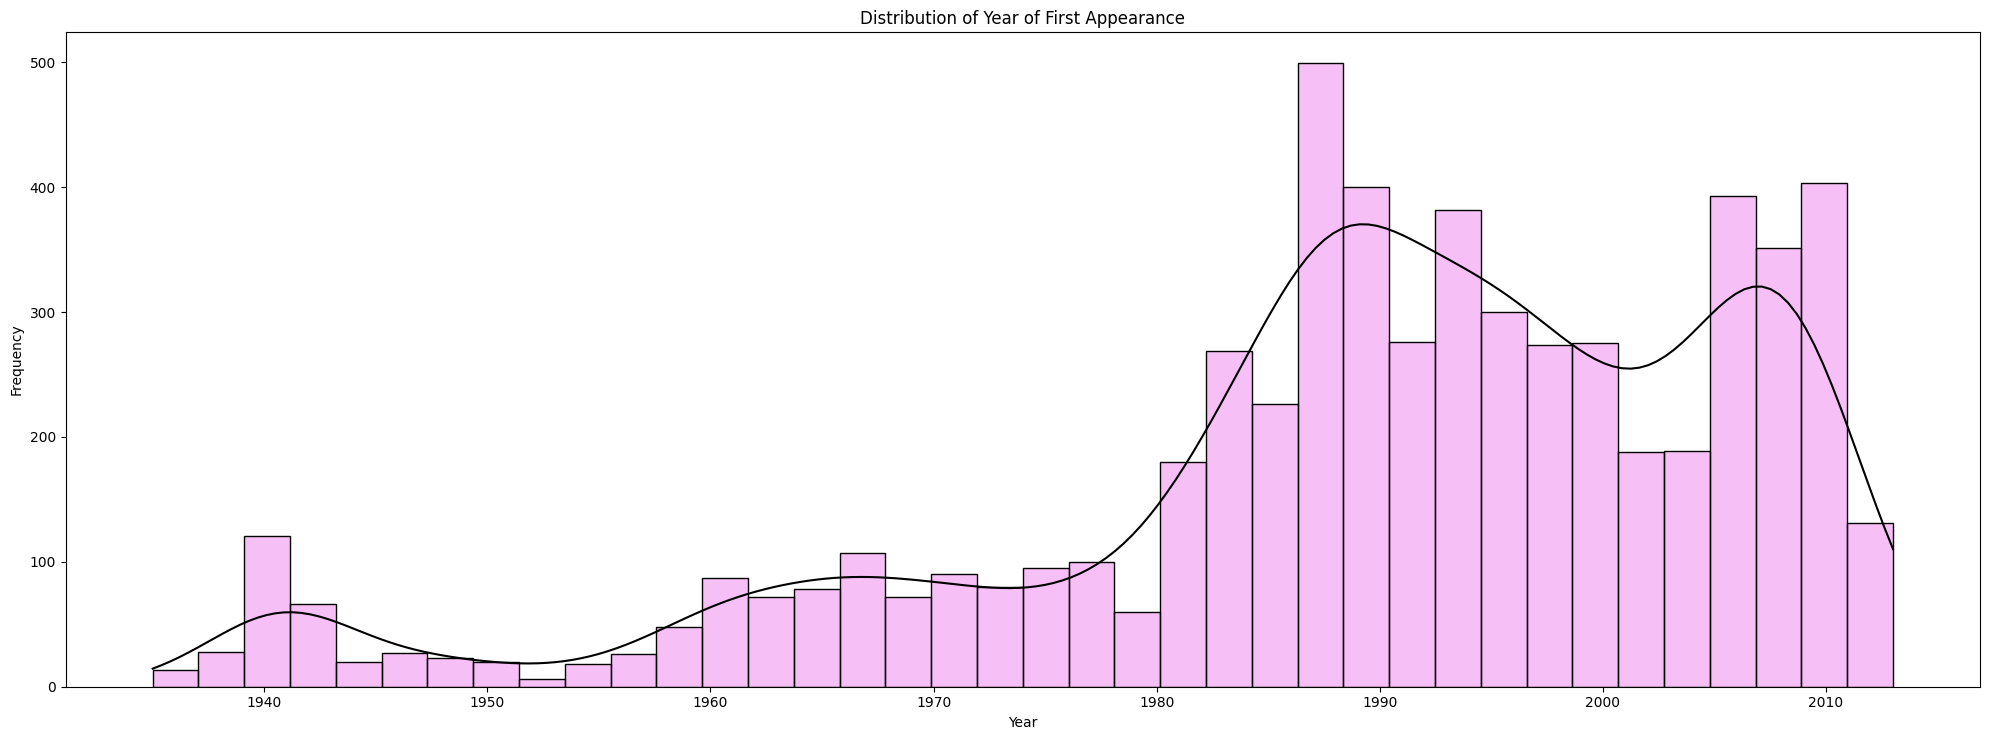

In [31]:
# --> Comment 3.1. Посмотрим на распределение первого появления (год)
fig, axes = plt.subplots(1, 1, figsize = (20, 7.5))
sn.histplot(dataset_cleaned['YEAR'], kde = True, color = 'violet')

axes.lines[0].set_color('black')
axes.set_title('Distribution of Year of First Appearance')
axes.set_xlabel('Year')
axes.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

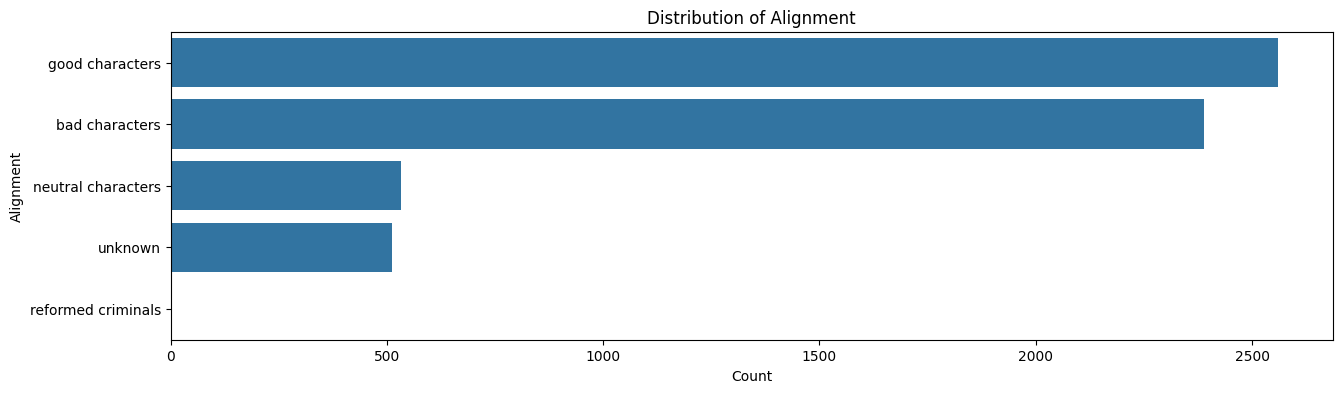

In [32]:
# --> Comment 3.2. Рассмотрим 'ALIGN'
plt.figure(figsize = (15, 4))
sn.countplot(data = dataset_cleaned, y='ALIGN')
plt.title('Distribution of Alignment')
plt.ylabel('Alignment')
plt.xlabel('Count')
plt.show()

# --> Comment 3.2.1. Вывод:
#     Большинство наиболее популярныз персонажей являются положительными.
#     Не сильно отстают и отрицательные персонажи.

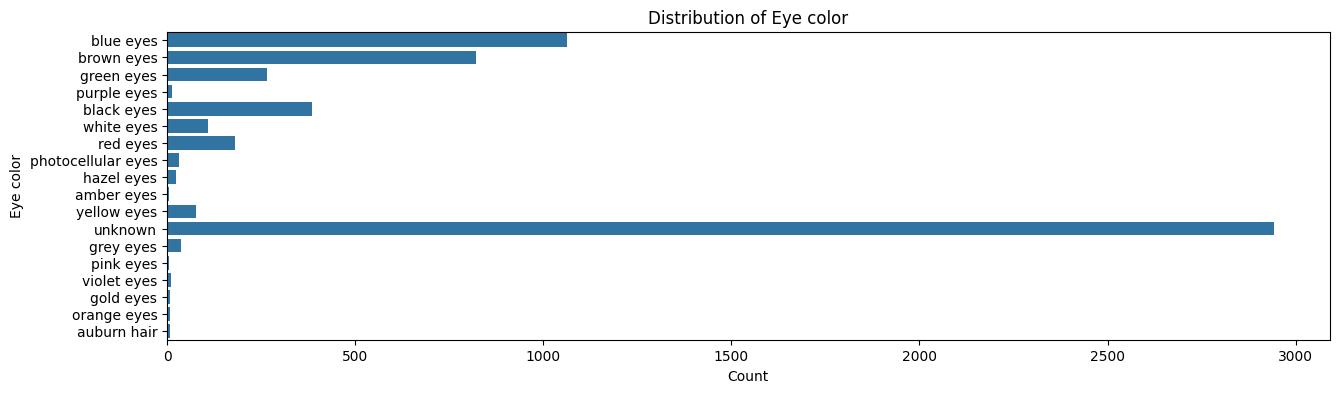

In [33]:
# --> Comment 3.3. Рассмотрим 'EYE'
plt.figure(figsize = (15, 4))
sn.countplot(data = dataset_cleaned, y='EYE')
plt.title('Distribution of Eye color')
plt.ylabel('Eye color')
plt.xlabel('Count')
plt.show()

# --> Comment 3.3.1. Вывод:
#     Наиболее популярными цветами глаз являются: голубой, карий

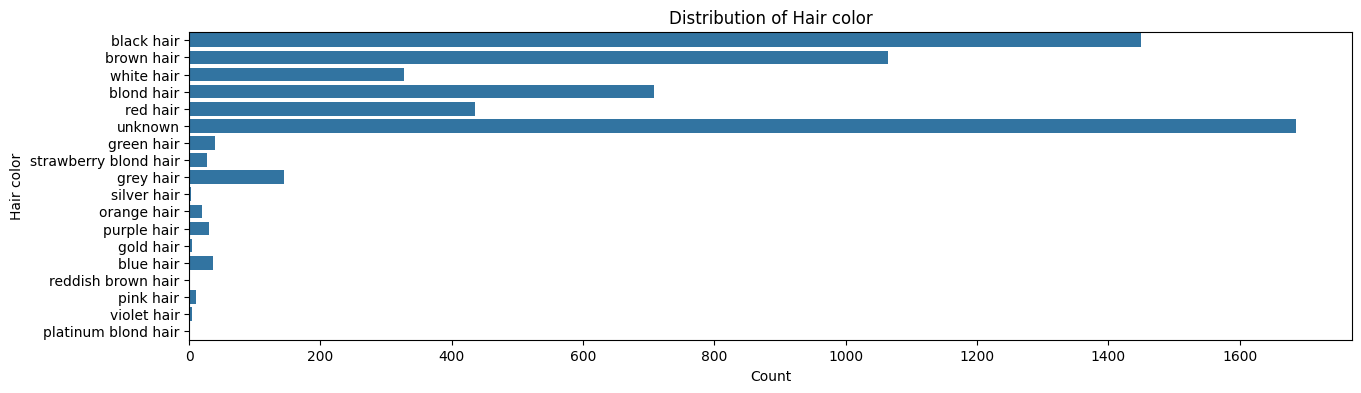

In [34]:
# --> Comment 3.4. Рассмотрим 'HAIR'
plt.figure(figsize = (15, 4))
sn.countplot(data = dataset_cleaned, y='HAIR')
plt.title('Distribution of Hair color')
plt.ylabel('Hair color')
plt.xlabel('Count')
plt.show()

# --> Comment 3.4.1. Вывод:
#     Наиболее популярными цветами волос являются: черный, коричневый

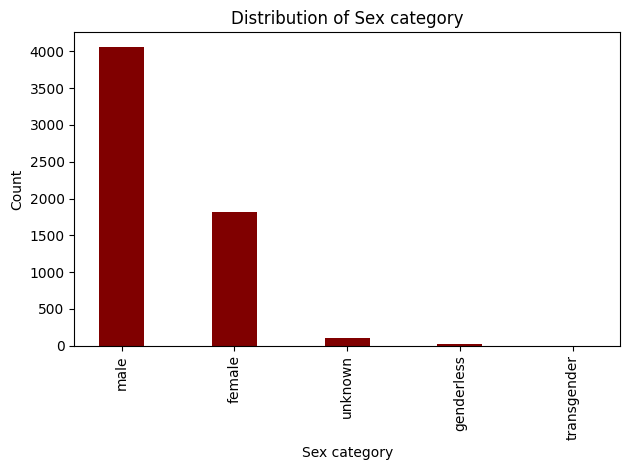

In [35]:
# --> Comment 3.5. Рассмотрим 'SexCategory'
sex_cat_counts = dataset_cleaned['SexCategory'].value_counts()

x = sex_cat_counts.index
y = sex_cat_counts.values

plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel('Sex category')
plt.ylabel('Count')
plt.title('Distribution of Sex category')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --> Comment 3.5.1. Вывод:
#     Наиболее популярными являются персонажи мужского пола.

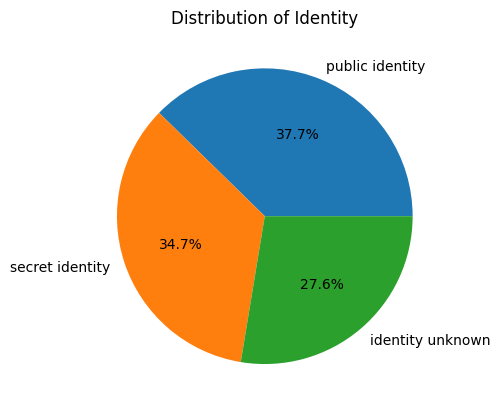

In [36]:
# --> Comment 3.6. Рассмотрим 'ID'
# Получим значения
id_values = dataset_cleaned['ID'].value_counts()

# Укажем параметры для круговой диаграммы
labels = id_values.index
sizes = id_values.values

# Создадим круговую диаграмму
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width': 1})
plt.title('Distribution of Identity')
plt.show()

# --> Comment 3.6.1. Вывод:
#     Наиболее популярными являются персонажи с public identity.

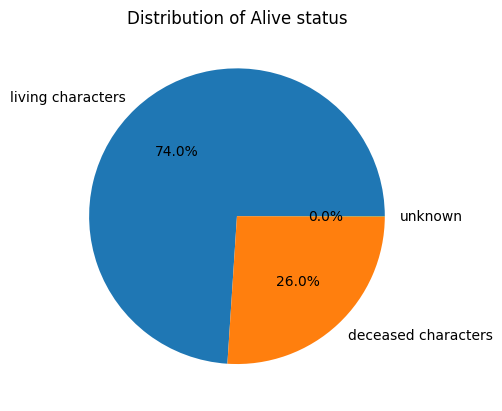

In [37]:
# --> Comment 3.7. Рассмотрим 'ALIVE'
# Получим значения
alive_values = dataset_cleaned['ALIVE'].value_counts()

# Укажем параметры для круговой диаграммы
labels = alive_values.index
sizes = alive_values.values

# Создадим круговую диаграмму
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width': 1})
plt.title('Distribution of Alive status')
plt.show()

# --> Comment 3.7.1. Вывод:
#     Наиболее популярными являются живые персонажи.

In [38]:
!pip install --upgrade nbformat


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# --> Comment 3.8. Рассмотрим Alive status and Sex Relationship
import plotly.express as px

fig_sunburst = px.sunburst(dataset_cleaned, path=['ALIVE', 'SEX'], title='Sunburst Chart: Alive status and Sex Relationship')
fig_sunburst.show()

# --> Comment 3.8.1. Вывод:
#     Среди умерших персонажей больше всего мужчин.

In [40]:
# --> Comment 3.9. Рассмотрим Alive status and Alignment Relationship
import plotly.express as px

fig_sunburst = px.sunburst(dataset_cleaned, path=['ALIVE', 'ALIGN'], title='Sunburst Chart: Alive status and Alignment Relationship')
fig_sunburst.show()

# --> Comment 3.9.1. Вывод:
#     Среди умерших персонажей больше всего отрицательных.

In [41]:
# --> Comment 3.10. Рассмотрим Sex and Alignment Relationship
import plotly.express as px

fig_sunburst = px.sunburst(dataset_cleaned, path=['SEX', 'ALIGN'], title='Sunburst Chart: Sex and Alignment Relationship')
fig_sunburst.show()

# --> Comment 3.10.1. Вывод:
#     Среди мужских персонажей больше всего отрицательных.
#     Среди женских персонажей больше всего положительных.

In [42]:
# --> Comment 3.11. Рассмотрим Character Appearances by Alignment
fig_box_alignment = px.box(dataset_cleaned, x='ALIGN', y='APPEARANCES', title='Character Appearances by Alignment')
fig_box_alignment.show()

# --> Comment 3.11.1. Вывод:
#     Чаще всего появлялись положительные персонажи.

In [43]:
# --> Comment 3.12. Рассмотрим Character Appearances by Sex
# Box plot
fig_box_sex = px.box(dataset_cleaned, x='SEX', y='APPEARANCES', title='Character Appearances by Sex')
fig_box_sex.show()

# Histogram
fig_hist_sex = px.histogram(dataset_cleaned, x='APPEARANCES', color='SEX', title='Character Appearances Histogram by Sex')
fig_hist_sex.show()

# --> Comment 3.12.1. Вывод:
#     Чаще всего появлялись персонажи мужчины.

In [44]:
# --> Comment 3.13. Рассмотрим Character Appearances by Hair color
# Box plot
fig_box_hair = px.box(dataset_cleaned, x='HAIR', y='APPEARANCES', title='Character Appearances by Hair color')
fig_box_hair.show()

# --> Comment 3.13.1. Вывод:
#     Наиболее популярными цветами волос являются: черный, коричневый (подтверждается Comment 3.4.1)

In [45]:
# --> Comment 3.14. Рассмотрим Character Appearances by Hair color category
# Box plot
fig_box_hair_cat = px.box(dataset_cleaned, x='HairCategory', y='APPEARANCES', title='Character Appearances by Hair color category')
fig_box_hair_cat.show()

# --> Comment 3.14.1. Вывод:
#     Темный цвет волос наиболее популярен.

In [46]:
# --> Comment 3.15. Рассмотрим Character Appearances by Eye color category
# Box plot
fig_box_eye_cat = px.box(dataset_cleaned, x='EyeCategory', y='APPEARANCES', title='Character Appearances by Eye color category')
fig_box_eye_cat.show()

# --> Comment 3.15.1. Вывод:
#     Светлый цвет глаз наиболее популярен.

In [47]:
# --> Comment 3.16. Рассмотрим Character Appearances by Eye color
# Box plot
fig_box_eye = px.box(dataset_cleaned, x='EYE', y='APPEARANCES', title='Character Appearances by Eye color')
fig_box_eye.show()

# --> Comment 3.16.1. Вывод:
#     Наиболее популярными цветами глаз являются: голубой и карий

4. Вычислим матрицу корреляции и построим heatmap для нее.

In [48]:
for column in dataset_cleaned.columns:
    # --> Comment 4.1. Пропустим нечисловые колонки
    if dataset_cleaned[column].dtype == 'object':
        # Присвоим числовые коды категориям, чтобы можно было составить матрицу корреляции и для нечисловых признаков
        dataset_cleaned[f'{column}_code'], labels = pd.factorize(dataset_cleaned[column])

dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5993 entries, 0 to 6531
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5993 non-null   object 
 1   ALIGN               5993 non-null   object 
 2   EYE                 5993 non-null   object 
 3   HAIR                5993 non-null   object 
 4   SEX                 5993 non-null   object 
 5   ALIVE               5993 non-null   object 
 6   APPEARANCES         5993 non-null   float64
 7   YEAR                5993 non-null   float64
 8   AlignCategory       5993 non-null   object 
 9   HairCategory        5993 non-null   object 
 10  EyeCategory         5993 non-null   object 
 11  SexCategory         5993 non-null   object 
 12  AliveCategory       5993 non-null   object 
 13  ID_code             5993 non-null   int64  
 14  ALIGN_code          5993 non-null   int64  
 15  EYE_code            5993 non-null   int64  
 16  HAIR_code  

In [49]:
annot = True
mask = dataset_cleaned.columns.str.contains('Category_code') | dataset_cleaned.columns.str.contains('APPEARANCES')
dataset_cleaned_and_categorized = dataset_cleaned.loc[:, mask]

print(dataset_cleaned_and_categorized)

      APPEARANCES  AlignCategory_code  HairCategory_code  EyeCategory_code  \
0          3093.0                   0                  0                 0   
1          2496.0                   0                  0                 0   
2          1565.0                   0                  0                 1   
3          1316.0                   0                  1                 1   
4          1237.0                   0                  0                 0   
...           ...                 ...                ...               ...   
6527          1.0                   3                  0                 3   
6528          1.0                   2                  0                 1   
6529          1.0                   0                  0                 3   
6530          1.0                   3                  1                 3   
6531          1.0                   3                  2                 3   

      SexCategory_code  AliveCategory_code  
0                 

In [50]:
correlation = dataset_cleaned_and_categorized.corr().round(3)

In [51]:
correlation

,APPEARANCES,AlignCategory_code,HairCategory_code,EyeCategory_code,SexCategory_code,AliveCategory_code
APPEARANCES,1.000,-0.072,-0.061,-0.199,-0.028,-0.025
AlignCategory_code,-0.072,1.000,0.051,0.057,0.037,-0.023
HairCategory_code,-0.061,0.051,1.000,0.245,-0.035,0.028
EyeCategory_code,-0.199,0.057,0.245,1.000,-0.049,-0.011
SexCategory_code,-0.028,0.037,-0.035,-0.049,1.000,-0.077
AliveCategory_code,-0.025,-0.023,0.028,-0.011,-0.077,1.000


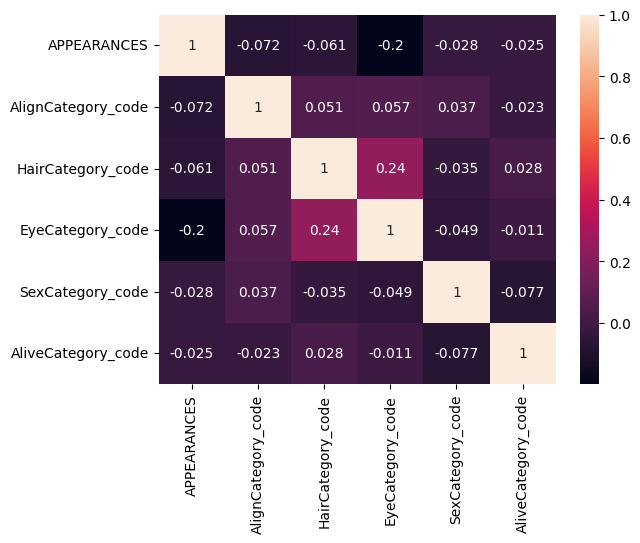

In [52]:
sn.heatmap(correlation, annot=True)
plt.show()

In [53]:
# --> Comment 4.2. Вывод:
#     Наблюдается некоторая корреляция между:
#       - Sex и Align
#       - Hair и Align
#       - Eye и Align
#       - Hair и Eye (максимальная корреляция)
#       - Hair и Alive